# 불러오기

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 블라인드에서 휴식, 점심시간 등의 키워드로 크롤링을 했고
# 전처리 완료된 파일
df = pd.read_csv('/content/블라인드_MicroBreak.csv',index_col=0)

In [ ]:
df.head()

,제목,본문,링크,조회수,좋아요,댓글,작성시간,작성일
0,담배타임 = 자유시간 아님?,흡연자들 흡연하러 눈치 안보고 지들 멋대로 나가는데 비흡연자들한테도 똑같이 자유시간...,https://www.teamblind.com/kr/post/%EB%8B%B4%EB...,조회수581,좋아요3,댓글16,작성시간2022.12.27.,NaN
1,담배타임,업무하다가 담배타임가지러 쫄래쫄래 따라가는 부하데리고 나가거나 우르르 나가는거 보면...,https://www.teamblind.com/kr/post/%EB%8B%B4%EB...,조회수767,좋아요좋아요,댓글18,작성시간2019.03.21.,NaN
2,담배타임,따라가지 않으면 서운해함? 은근 그런 거 있어보여서ㅋㅋㅋ,https://www.teamblind.com/kr/post/%EB%8B%B4%EB...,조회수125,좋아요좋아요,댓글0,작성시간2021.02.06.,NaN
3,담배타임 시작,얼른 한대씩 피우고 오셔들 후반에 힘내서 역전해보자,https://www.teamblind.com/kr/post/%EB%8B%B4%EB...,조회수87,좋아요3,댓글1,작성시간2022.11.28.,NaN
4,"담배타임, 회식이 빡치는 이유","정치판의 시작이자 불투명의 시작임ㅋㅋㅋ 흡연장, 회식에서 윗사람들은 아랫사람에게 ...",https://www.teamblind.com/kr/post/%EB%8B%B4%EB...,조회수250,좋아요5,댓글8,작성시간2022.12.25.,NaN


In [ ]:
# 폰트 다운로드
# 다운로드 받고 런타임 재시작 하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 29.6 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt
import nltk # 자연어처리 패키지
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# 1. BoW -> WordCloud
contents와 titles에서 글 가져와 BoW에 넣기

In [ ]:
contents = list(df['본문'])
titles = list(df['제목'])

In [ ]:
all_text = contents + titles

In [ ]:
len(all_text)

22366

In [ ]:
okt = Okt()

BoW_documents = []

for i in all_text:
    BoW_documents.append(okt.morphs(i))

In [ ]:
BoW_list = [item for sublist in BoW_documents for item in sublist]

### 품사 안 가리고 구한다음 tfidf로 중요한 단어 뽑아보기

### tf-idf

In [ ]:
# tf-idf 정의
import math

# Function to calculate term frequency
def calculate_tf(word, document):
    return document.count(word) / len(document)

# Function to calculate inverse document frequency
def calculate_idf(word, documents):
    num_documents_containing_word = len([True for document in documents if word in document])
    if num_documents_containing_word == 0:
        return 0
    else:
        return math.log(len(documents) / num_documents_containing_word)

# Function to calculate TF-IDF
def calculate_tfidf(word, document, documents):
    tf = calculate_tf(word, document)
    idf = calculate_idf(word, documents)
    return tf * idf

In [ ]:
tfidf_scores = {}
for word, count in BoW_freq.items():
    tfidf_scores[word] = calculate_tfidf(word, BoW_documents[count-1], BoW_documents)
    
print(tfidf_scores)

In [ ]:
cloud = WordCloud(font_path = 'NanumBarunGothic')
cloud = cloud.fit_words(tfidf_scores)

In [ ]:
# 딕셔너리의 키-값 쌍을 리스트로 변환하고 값에 대해 내림차순으로 정렬
sorted_dict = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)

# 정렬된 리스트 출력
print(sorted_dict)

In [ ]:
# 중요 단어 추출
important_words = []
for i in range(len(sorted_dict)):
    if sorted_dict[i][1] > 0:
        important_words.append(sorted_dict[i])

In [ ]:
important_words

[('힘내서', 0.7844548060425676),
 ('때리기', 0.4805486414737859),
 ('나가는', 0.27700005823340246),
 ('아랫사람', 0.27393659893549976),
 ('쫄래쫄래', 0.16949363721869432),
 ('나오는', 0.16875153905392273),
 ('인터넷', 0.15581454382542193),
 ('몰랐다', 0.11866745703724735),
 ('가만히', 0.11642666242514536),
 ('점심', 0.11190221943318336),
 ('12', 0.10180040281749693),
 ('출근', 0.09036211942237624),
 ('하며', 0.08711347271446089),
 ('거', 0.08044353305324724),
 ('카페', 0.07573362923824496),
 ('농땡', 0.07525603909218785),
 ('근데', 0.0672608831215841),
 ('만에', 0.06596552130196047),
 ('올라와서', 0.061573122893608244),
 ('뚝딱', 0.061573122893608244),
 ('9시', 0.059595096691179544),
 ('혼자', 0.059035406649135286),
 ('게', 0.05722120147825512),
 ('그런지', 0.05615338421519257),
 ('까지', 0.054026825187355014),
 ('함', 0.05267657776941341),
 ('?', 0.052383565634343855),
 ('겨우', 0.0494803600213701),
 ('첫', 0.04800002145015903),
 ('나름', 0.04549964731537834),
 ('길', 0.044586277531729404),
 ('본', 0.04386768961865629),
 ('감', 0.042399242783298666),


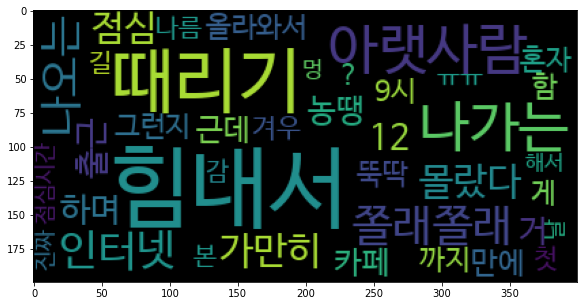

In [ ]:
# 워드 클라우드
plt.figure(figsize=(10,5))
plt.imshow(cloud)
plt.show()

In [ ]:
df.query('본문.str.contains("농땡") == True').reset_index(drop=True)

,제목,본문,링크,조회수,좋아요,댓글,작성시간,작성일
0,직원들 담배 타임 기다려 주는 거 개피곤하다…,우리 팀 나 빼고 싹 흡연잔데 외근이 잦음. 근데 외근 나가서 어디 옮길 때마다 담...,https://www.teamblind.com/kr/post/%EC%A7%81%EC...,조회수116,좋아요2,댓글2,작성시간2022.08.13.,NaN
1,남자직원들 담배피고 농땡이 피우는 거,너무너무 보기 싫은데 어떻게 해야될까? 우리팀장이 일을 안해. 멍 때리고 있다가 ...,https://www.teamblind.com/kr/post/%EB%82%A8%EC...,조회수813,좋아요4,댓글42,작성시간2018.11.05.,NaN
2,다들 회사에서 쉬는시간 얼마나 가져??\n 투표,점심시간 저녁시간 중간에 정해진 휴식시간말고 하루에 얼마나 쉬는지 궁금하네 난 3일...,https://www.teamblind.com/kr/post/%EB%8B%A4%EB...,조회수71,좋아요2,댓글7,작성시간03.10,NaN
3,입사 10개월차 깨달은거,농땡이칠수있는 시간 안챙기면 정말 쉴 시간이 없더라 내 쉬는시간 줄인다고 퇴근시간...,https://www.teamblind.com/kr/post/%EC%9E%85%EC...,조회수415,좋아요6,댓글10,작성시간2019.01.03.,NaN
4,흉기차 연구소 점거한 금속노조들,연구소는 새로 차 만들거나 테스트할 때\n장비랑 차량 개조를 해야해서 기술자가 필요...,https://www.teamblind.com/kr/post/%ED%9D%89%EA...,NaN,NaN,NaN,NaN,2022-06-16
5,요즘 이직 개마려운 EU,"업무강도가 낮고 출근부터 퇴근까지\n업무 3시간, 점심 1시간, 5시간 농땡이(흡연...",https://www.teamblind.com/kr/post/%EC%9A%94%EC...,NaN,NaN,NaN,NaN,2021-10-26
6,내직장은 아니고 연봉1억2천,9-6 칼출근 칼퇴근 가능\n점심시간 1시간15분 정도\n대신 일하는시간 농땡이 불...,https://www.teamblind.com/kr/post/%EB%82%B4%EC...,NaN,NaN,NaN,NaN,2021-05-29
7,다들 회사에서 쉬는시간 얼마나 가져??\n 투표,점심시간 저녁시간 중간에 정해진 휴식시간말고 하루에 얼마나 쉬는지 궁금하네\n난 3...,https://www.teamblind.com/kr/post/%EB%8B%A4%EB...,NaN,NaN,NaN,NaN,2023-03-10
8,팀에 농땡이 오지게 피우는인간 많냐,난 팀장놈 아침에 농땡이1시간 점심시간30분더쓰고\n끝나기전 1시간어디서 농땡이피우...,https://www.teamblind.com/kr/post/%ED%8C%80%EC...,NaN,NaN,NaN,NaN,2020-10-23
9,소형 공장은 망하고 재정립될것같다,사지멀쩡한 남자기준 고깃집 11-21 식사시간 두시간 휴식시간 두시간 주고 서울에서...,https://www.teamblind.com/kr/post/%EC%86%8C%ED...,조회수173,좋아요2,댓글6,작성시간2022.12.11.,NaN


In [ ]:
df.query('본문.str.contains("때리기") == True').reset_index(drop=True)

,제목,본문,링크,조회수,좋아요,댓글,작성시간,작성일
0,다들 솔직히 몇시간 일하냐?\n 투표,"투표해보자 담배타임, 똥오줌, 화장고치기, 티타임, 멍때리기, 동료들끼리 잡담시간...",https://www.teamblind.com/kr/post/%EB%8B%A4%EB...,조회수705,좋아요좋아요,댓글9,작성시간2018.11.16.,NaN
1,집에서 멍 때리기,휴일엔 멍 때리기 만날 사람도 없고 외롭다 🥰,https://www.teamblind.com/kr/post/%EC%A7%91%EC...,조회수297,좋아요1,댓글11,작성시간2022.08.11.,NaN
2,'2022 한강 멍 때리기 대회','2022 한강 멍 때리기 대회' 다음엔 나도 나가볼까. 나도 멍 잘 때리는데. ...,https://www.teamblind.com/kr/post/2022-%ED%95%...,조회수442,좋아요좋아요,댓글4,작성시간2022.09.18.,NaN
3,멍때리기,난 멍때리기 좋아하거든 어느정도냐면 운전을 출발지에서 도착지까지 30분했는데 그 중...,https://www.teamblind.com/kr/post/%EB%A9%8D%EB...,조회수276,좋아요1,댓글7,작성시간2021.06.07.,NaN
4,크러쉬가 참석한 멍때리기대회,크러쉬가 멍때리기 대회 1등했다는데... ㅎ 나도 멍때리는거 잘하는데 한 번 나가 ...,https://www.teamblind.com/kr/post/%ED%81%AC%EB...,조회수568,좋아요좋아요,댓글1,작성시간2022.01.09.,NaN
...,...,...,...,...,...,...,...,...
271,재회 연락 D-27,너와 헤어지고 나서 약 한달간 내 인생에서 가장 큰 슬럼프가 왔던 것 같아 속은...,https://www.teamblind.com/kr/post/%EC%9E%AC%ED...,조회수406,좋아요9,댓글6,작성시간2022.01.11.,NaN
272,헤어진지 이틀째,내가 지금 뭐하고있는건지 모르겠다 이게 지금 사람사는게 맞는건가 싶고 우울과 화남과...,https://www.teamblind.com/kr/post/%ED%97%A4%EC...,조회수858,좋아요3,댓글11,작성시간2018.07.16.,NaN
273,다들 솔직히 몇시간 일하냐?\n 투표,"투표해보자\n\n담배타임, 똥오줌, 화장고치기, 티타임, 멍때리기, 동료들끼리 잡담...",https://www.teamblind.com/kr/post/%EB%8B%A4%EB...,NaN,NaN,NaN,NaN,2018-11-16
274,재택이 개꿀인점,아침에 근무 시작전에 편의점 가서 먹을거 미리 사와놓고\n점심시간 시작하자마자 얼른...,https://www.teamblind.com/kr/post/%EC%9E%AC%ED...,NaN,NaN,NaN,NaN,2021-08-31


In [ ]:
df.query('본문.str.contains("출근") == True').reset_index(drop=True)

,제목,본문,링크,조회수,좋아요,댓글,작성시간,작성일
0,회사 담배 타임.. 도대체 일은 언제하냐? 흡연자들,아니 여기는 흡연자들 천국인것 같음 출근해서 15~20분 점심 시간 되기 전에 ...,https://www.teamblind.com/kr/post/%ED%9A%8C%EC...,조회수138,좋아요1,댓글5,작성시간03.02,NaN
1,시간외 한다고 두시간 일찍 오는 인간 하는 일,7시 출근 8시까지 샤워 8시 40분까지 담배타임 8시 40분 사무실 도착 9시 담...,https://www.teamblind.com/kr/post/%EC%8B%9C%EA...,조회수540,좋아요1,댓글5,작성시간2021.10.12.,NaN
2,애 엄마 아빠들 다 이렇게 힘들게 사나??,나 하루 자유시간 거의 1시간인데 다 이렇게 살아?? 07:00 아침 기상 샤워...,https://www.teamblind.com/kr/post/%EC%95%A0-%E...,조회수72K,좋아요219,"댓글1,060",작성시간01.18,NaN
3,아침부터 탈룰라 오지게했네,출근하고 담배타임에 구급차 막은 택시기사 얘기로 시작해 서로 자기가 겪은 그지같은 ...,https://www.teamblind.com/kr/post/%EC%95%84%EC...,조회수435,좋아요1,댓글6,작성시간2020.07.06.,NaN
4,좃소기업 다니는 대리의 하루,아침 8시40분에서 9시10분 사이에 출근... 근태 그렇게 신경 쓰지 않음 회사...,https://www.teamblind.com/kr/post/%EC%A2%83%EC...,조회수431,좋아요1,댓글19,작성시간2022.09.22.,NaN
...,...,...,...,...,...,...,...,...
687,(육아) 맞벌이 아내를 대하는 남자들의 큰 착각이,출산 후 육아 때문에 어쩔 수 없이 아내가 그만두는 상황을 굉장한 배려와 자유를 준...,https://www.teamblind.com/kr/post/%EC%9C%A1%EC...,조회수607,좋아요27,댓글18,작성시간2022.10.27.,NaN
688,"지방직이고, 사전투표 장비담당으로 퇴근함.","지방행정7급이고, 얼마전까지 민원창구있었어 오늘 한 일은, 신분증 주면 용지주는직...",https://www.teamblind.com/kr/post/%EC%A7%80%EB...,조회수366,좋아요19,댓글3,작성시간2022.03.05.,NaN
689,코골이 수술 후기(비중격만곡증),결론적으로 말하면 아주만족 별 네개 반. 비염수술로도 많이 하는 비중격만곡증 교정...,https://www.teamblind.com/kr/post/%EC%BD%94%EA...,"조회수3,133",좋아요16,댓글29,작성시간2020.08.11.,NaN
690,아 진짜 이시간에 문두드리는거,눈뜨자마자 스트레스 받아버렸다..... 어제 밤에 퇴근하고 오니 통장이 마스크 나...,https://www.teamblind.com/kr/post/%EC%95%84-%E...,조회수841,좋아요1,댓글32,작성시간2020.04.02.,NaN


### 명사 워드 클라우드

In [ ]:
stopwords = []
with open('/content/stopwords.txt','r') as f:
    for i in f:
        stopwords.append(i)

In [ ]:
stopwords_proc = []
for i in stopwords:
    stopwords_proc.append(i.replace('\n',''))

In [ ]:
def count_noun(lines):
  okt = Okt()
  counts = Counter()

  for line in lines:
    line = str(line)
    tags = okt.pos(line, stem=True)
    for morph, tag in tags:
      if tag == 'Noun' and morph not in stopwords_proc:
        counts[morph] +=1
  return counts

In [ ]:
counts = count_noun(all_text)

In [ ]:
cloud = WordCloud(font_path = 'NanumBarunGothic')
cloud = cloud.fit_words(counts)

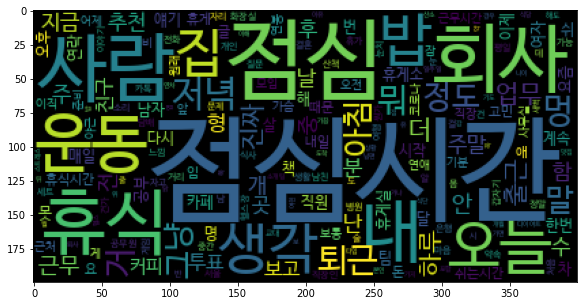

In [ ]:
# 워드 클라우드
plt.figure(figsize=(10,5))
plt.imshow(cloud)
plt.show()

# 2. 워드 임베딩

In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# 앞에서 okt로 만들었던 BoW_documents를 대상으로 Word2Vec으로 임베딩 진행
model = Word2Vec(sentences = BoW_documents, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(9752, 100)

In [ ]:
model.wv.most_similar("휴식")

[('운동', 0.7612820863723755),
 ('휴식시간', 0.7191758155822754),
 ('야근', 0.7068031430244446),
 ('공부', 0.6914909482002258),
 ('준비', 0.690756618976593),
 ('하체', 0.6900126338005066),
 ('할애', 0.6652209758758545),
 ('약', 0.6628142595291138),
 ('상체', 0.6623222231864929),
 ('루틴', 0.6567819118499756)]

In [ ]:
model.wv.most_similar("농땡")

[('역시', 0.9507853388786316),
 ('쉬는것도', 0.9486371874809265),
 ('쉬는게', 0.9450015425682068),
 ('갖다', 0.9447091817855835),
 ('눈물', 0.944621205329895),
 ('10-20분', 0.9444819092750549),
 ('이러니', 0.9421623945236206),
 ('나는데', 0.9420689344406128),
 ('매번', 0.9408295750617981),
 ('그러니까', 0.9407012462615967)]

In [ ]:
# 모델 저장 및 불러오기
model.save('blind_word2vec.model')
model = Word2Vec.load('blind_word2vec.model')

### 워드 임베딩 시각화

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors  

In [ ]:
blind_model = Word2Vec.load('/content/blind_word2vec.model')

In [ ]:
word_vectors = blind_model.wv

In [ ]:
# 단어장과 벡터 리스트 가져오기
vocabs = word_vectors.key_to_index.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

* 2차원으로 축소하고 시각화

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

xys = pca.fit_transform(word_vectors_list)
# x축 좌표
xs = xys[:,0]
# y축 좌표
ys = xys[:,1]

In [ ]:
xys

array([[ 1.61073807,  0.28687075],
       [ 1.83479614,  0.13101134],
       [ 1.38935558, -2.73194577],
       ...,
       [-0.50470663,  0.06019911],
       [-0.6496341 ,  0.03085337],
       [-0.82535039,  0.01631111]])

In [ ]:
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(30,20))
    plt.scatter(xs, ys, marker = 'o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

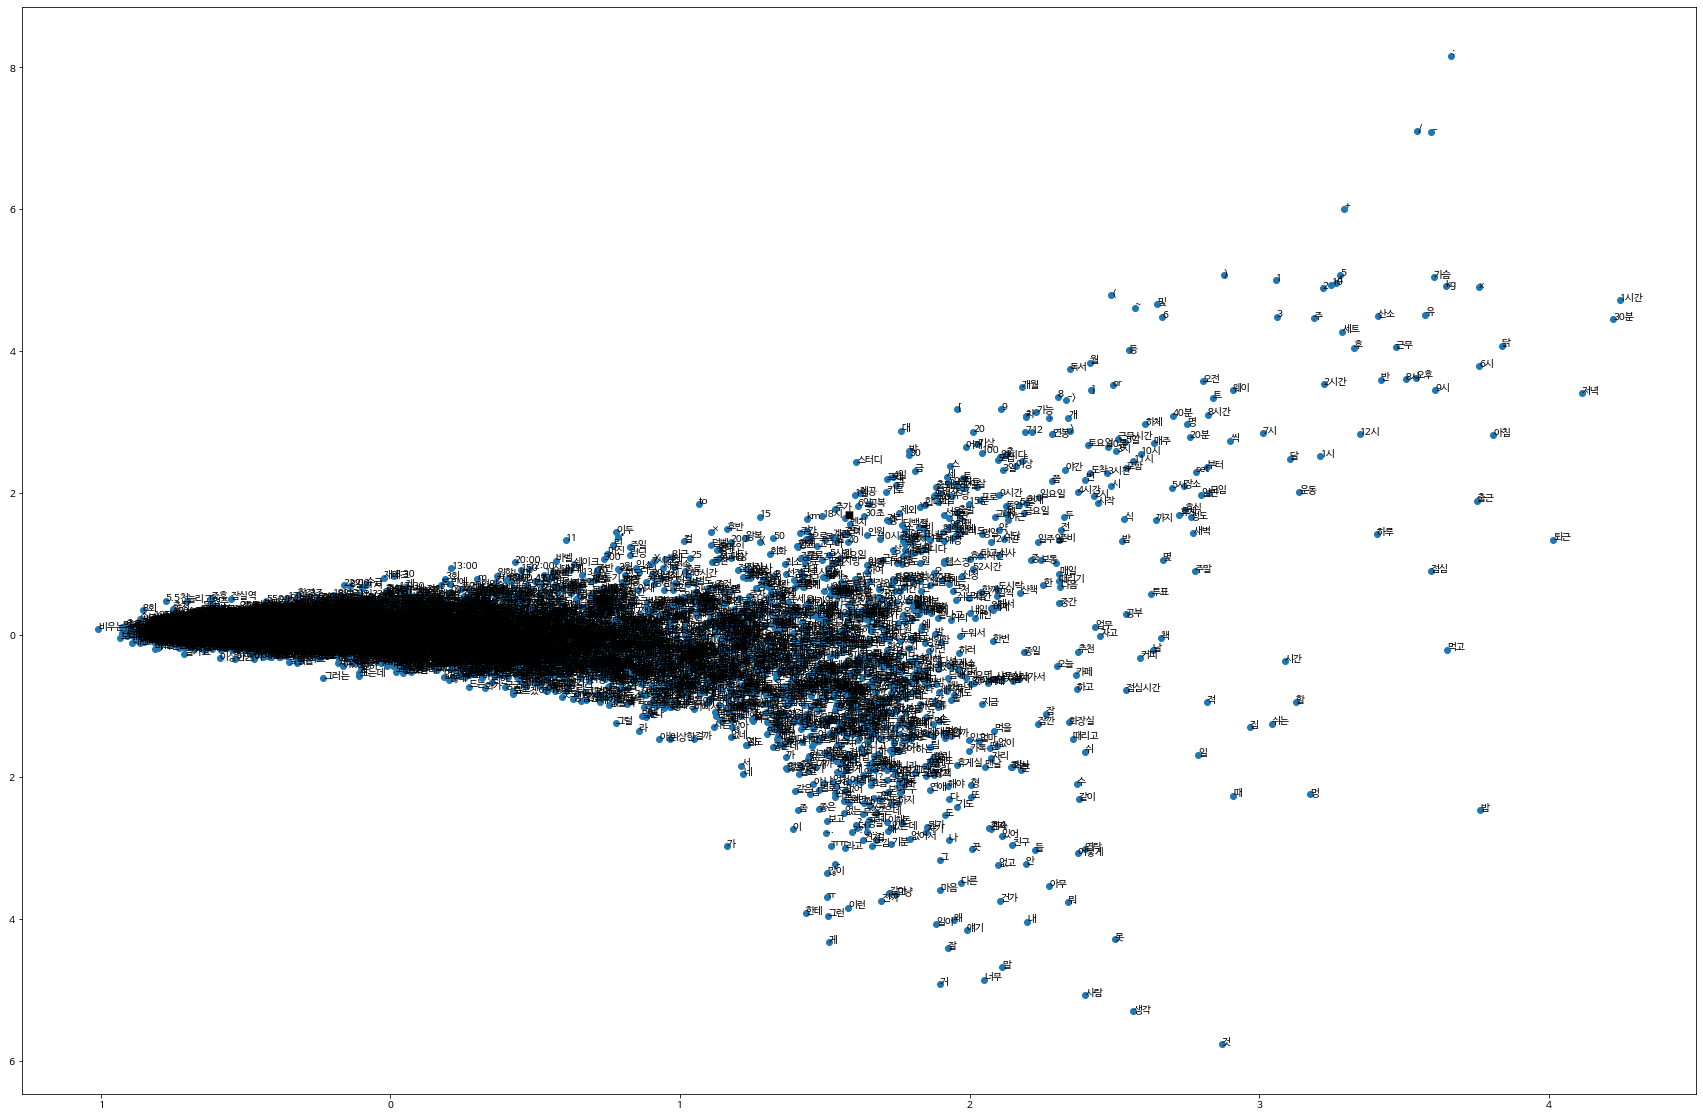

In [ ]:
plot_2d_graph(vocabs, xs, ys)

* 3차원으로 축소하고 시각화

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

xys = pca.fit_transform(word_vectors_list)
# x축 좌표
xs = xys[:,0]
# y축 좌표
ys = xys[:,1]
# z축 좌표
zs = xys[:,2]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_graph(vocabs, xs, ys, zs):
    fig = plt.figure(figsize=(30, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs, ys, zs, marker='o')
    for i, v in enumerate(vocabs):
        ax.text(xs[i], ys[i], zs[i], v)

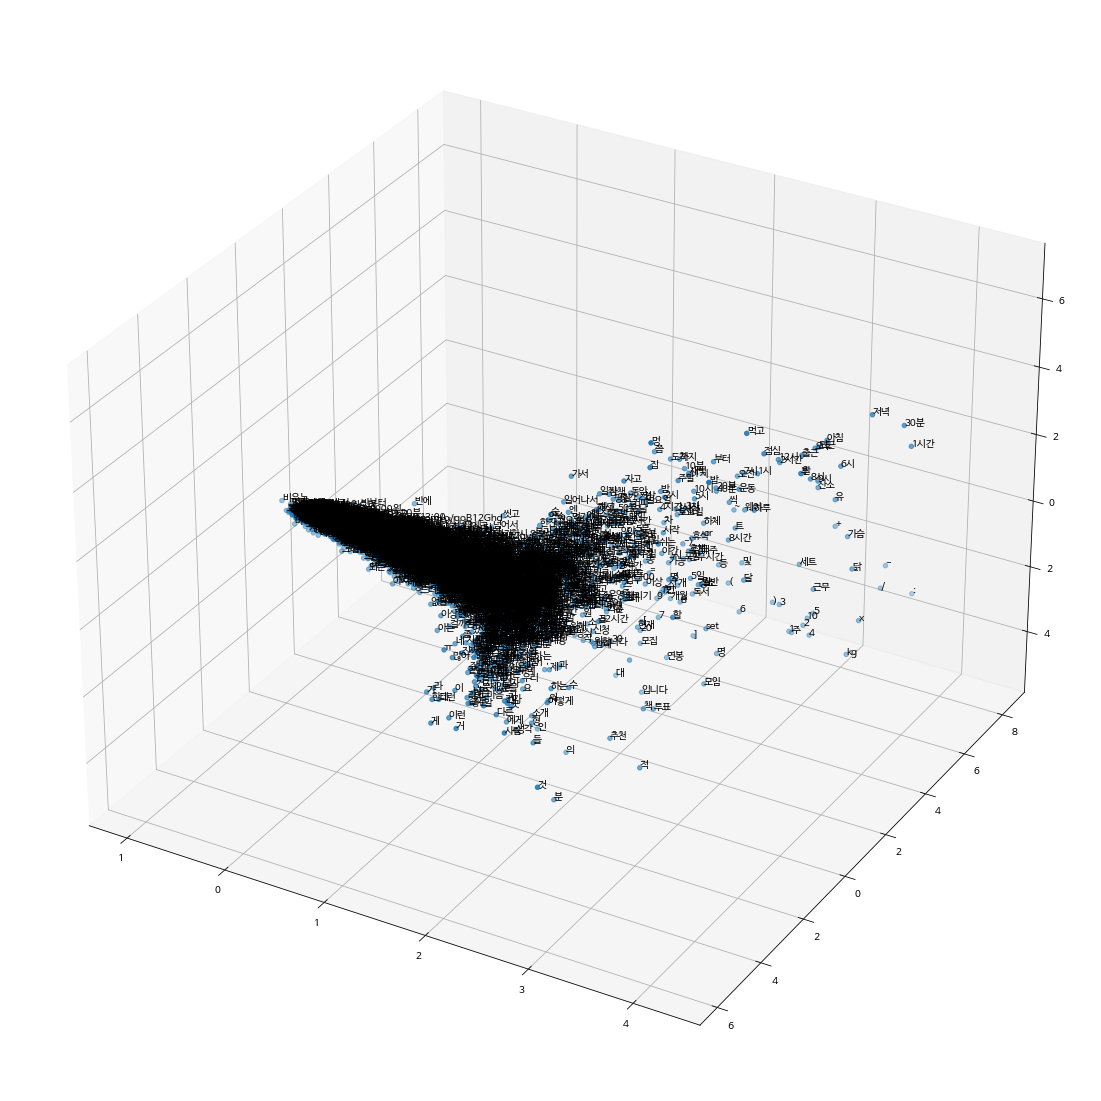

In [ ]:
plot_3d_graph(vocabs, xs, ys, zs)

# 문서와 단어간의 유사도
특정 단어와 유사도 높은 문서 둘러보며 insight 끌어오기

* 문서를 벡터화 해서 단어와 유사도를 구하는 방식
* 이 때, 1) 문서에서 사용된 단어벡터들의 평균과 2) 단어벡터를 구하고
* 1)과 2) 사이의 코사인 유사도를 통해 **문서와 단어간의 유사도를 구할 수 있다**

In [ ]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# Word2Vec 모델 로드
model = Word2Vec.load("/content/blind_word2vec.model")

In [ ]:
len(contents)

11183

In [ ]:
# 단어 벡터
word = '휴식'
word_vector = model.wv[word]

In [ ]:
print(word_vector, end=' ')

[-1.192726    0.63538516 -0.05059091 -1.2577375   0.3860919  -0.09597614
 -0.27619573  1.1062185   0.28086022 -0.48079666 -0.43619078 -0.7115912
  0.10568058  0.8036926   0.42375517 -0.8727063  -0.40943146  0.54708487
 -0.7533226   0.12652552  0.08933135 -0.758364   -0.7942346   0.9730071
 -0.6612578  -0.8135858  -0.04773942 -0.6387774   0.01628949 -0.51235586
 -0.36188853  0.45309943  0.20970756 -0.49651912 -0.54728556 -0.74755335
 -0.78208977 -1.1961573  -0.72437215 -0.7051388  -2.0879836   0.6644265
  0.42038572  0.08193692 -1.4472257   0.15091217  0.07964219 -1.237786
 -0.26781258  0.686013    0.7011515  -1.4202219   0.43903077 -0.92993295
  0.92740864 -1.2476937   0.7443847   0.5507553  -0.34992862  0.4985596
 -0.28988528  0.24852353  0.00747542 -0.5649512  -2.1563742   0.19255927
  0.7107557  -0.01961425 -0.46197873  0.6410368  -0.3705601  -0.72348106
 -0.4768112  -1.4890811   0.05596063 -0.58304346  0.4440213   0.9279784
 -1.0570941  -0.81572664 -0.68801165  0.67021126 -0.167322

### 유의사항
* 이 때, word2vec를 빈도수 5이상인 것으로 학습시켰기 때문에 없는 단어 때문에 에러가 날 수 있다.
* 또한 okt morph 특성상 전에 -> ['전','에']로 전처리를 할 수 있어 이 부분에서 실수가 일어날 수 있다.


In [ ]:
# Word2Vec으로 임베딩한 단어 리스트이다.
vocabs = word_vectors.key_to_index.keys()
vocabs

In [ ]:
# 아래와 같이 벡터값을 반환해준다.
model.wv['이디야']

array([-0.00949629, -0.00417608,  0.01548023,  0.0645748 ,  0.00564123,
       -0.0224271 ,  0.01245002,  0.05894633, -0.04036343, -0.05924291,
        0.0154527 , -0.07870585, -0.01178738,  0.00061306,  0.02641501,
       -0.03827077, -0.01305583, -0.03998385, -0.02713993, -0.03050509,
        0.02881034,  0.01418752, -0.05550441,  0.00229102, -0.00831063,
        0.0100051 , -0.01512162, -0.01466232, -0.02391863,  0.00532155,
       -0.02358893,  0.06774467, -0.04323343, -0.01815199, -0.02440133,
        0.04054088, -0.01901292, -0.05320217, -0.03134598, -0.08188983,
       -0.00827515,  0.00995187, -0.00974512, -0.0418762 ,  0.0106564 ,
       -0.01442744,  0.02018443, -0.03575175, -0.00034695,  0.07259884,
        0.04592821, -0.04111418,  0.01265148, -0.0719417 , -0.04338257,
        0.00134504,  0.08723234,  0.02269238,  0.00385248,  0.00919553,
        0.0425778 , -0.01764013, -0.04176464, -0.02917637, -0.02684128,
        0.01684361, -0.03505448,  0.03009926, -0.01457963, -0.00

### 휴식과의 유사도 계산 시작

In [ ]:
df_extend = df.copy()

In [ ]:
# 단어 벡터
word = '휴식'
word_vector = model.wv[word]

In [ ]:
# 유사도 5 미만인 단어에 대해서는 임베딩이 되지 않았기에 에러가 나올 인덱스를 저장하는 곳이다.
error_idx = []

# 문서 벡터 가져오기
okt = Okt()
document_vectors = []
for idx, document in enumerate(contents):
    document_words = document.split()
    
    # 형태소 나누기, 없는 단어는 넣지 않기
    okt_words = []
    for word in document_words:
        
        # # ['전', '에'] 이런 식으로 되는 건 거르기, okt할 때 문제 발생
        if word in vocabs:
            temp111 = okt.morphs(word)
            if len(temp111) == 1:
                okt_words.append(temp111)

    # 만약 어떤 문서에서 빈도수 5이하인 단어만 사용되었다면 에러 인덱스에 포함시키기
    if len(okt_words) == 0:
        document_vector = np.zeros((model.vector_size,))
        error_idx.append(idx)
    else:
        # 문서 벡터 : 각 단어의 워드 임베딩 벡터를 구해서 모두 더한 뒤, 단어의 개수로 나누어 평균값을 구하는 방식
        document_vector = sum([model.wv[word] for word in okt_words]) / len(okt_words)

    document_vectors.append(np.squeeze(document_vector))
document_vectors_array = np.array(document_vectors)

In [ ]:
sim_scores = []
for i in document_vectors_array:
    temp_scores = cosine_similarity([i, word_vector])
    sim_score = temp_scores[0][1]
    sim_scores.append(sim_score)

In [ ]:
# 전체 다 순서대로 되었는지 검토
len(contents), len(document_vectors), len(sim_scores)

(11183, 11183, 11183)

In [ ]:
df_extend['휴식과의 유사도'] = sim_scores

### 운동과의 유사도 계산 시작

In [ ]:
# 단어 벡터
word = '운동'
word_vector = model.wv[word]

# 문서 벡터 가져오기
error_idx = []

okt = Okt()
document_vectors = []
for idx, document in enumerate(contents):
    document_words = document.split()
    
    # 형태소 나누기, 없는 단어는 넣지 않기
    okt_words = []
    for word in document_words:
        
        # # ['전', '에'] 이런 식으로 되는 건 거르기, okt할 때 문제 발생
        if word in vocabs:
            temp111 = okt.morphs(word)
            if len(temp111) == 1:
                okt_words.append(temp111)

    # 만약 어떤 문서에서 빈도수 5이하인 단어만 사용되었다면 에러 인덱스에 포함시키기
    if len(okt_words) == 0:
        document_vector = np.zeros((model.vector_size,))
        error_idx.append(idx)
    else:
        # 문서 벡터 : 각 단어의 워드 임베딩 벡터를 구해서 모두 더한 뒤, 단어의 개수로 나누어 평균값을 구하는 방식
        document_vector = sum([model.wv[word] for word in okt_words]) / len(okt_words)

    document_vectors.append(np.squeeze(document_vector))
document_vectors_array = np.array(document_vectors)

In [ ]:
sim_scores = []
for i in document_vectors_array:
    temp_scores = cosine_similarity([i, word_vector])
    sim_score = temp_scores[0][1]
    sim_scores.append(sim_score)

In [ ]:
# 전체 다 순서대로 되었는지 검토
len(contents), len(document_vectors), len(sim_scores)

(11183, 11183, 11183)

In [ ]:
df_extend['운동과의 유사도'] = sim_scores

### 점심시간과의 유사도 계산 시작

In [ ]:
# 단어 벡터
word = '점심시간'
word_vector = model.wv[word]

# 문서 벡터 가져오기
error_idx = []

okt = Okt()
document_vectors = []
for idx, document in enumerate(contents):
    document_words = document.split()
    
    # 형태소 나누기, 없는 단어는 넣지 않기
    okt_words = []
    for word in document_words:
        
        # # ['전', '에'] 이런 식으로 되는 건 거르기, okt할 때 문제 발생
        if word in vocabs:
            temp111 = okt.morphs(word)
            if len(temp111) == 1:
                okt_words.append(temp111)

    # 만약 어떤 문서에서 빈도수 5이하인 단어만 사용되었다면 에러 인덱스에 포함시키기
    if len(okt_words) == 0:
        document_vector = np.zeros((model.vector_size,))
        error_idx.append(idx)
    else:
        # 문서 벡터 : 각 단어의 워드 임베딩 벡터를 구해서 모두 더한 뒤, 단어의 개수로 나누어 평균값을 구하는 방식
        document_vector = sum([model.wv[word] for word in okt_words]) / len(okt_words)

    document_vectors.append(np.squeeze(document_vector))
document_vectors_array = np.array(document_vectors)

In [ ]:
sim_scores = []
for i in document_vectors_array:
    temp_scores = cosine_similarity([i, word_vector])
    sim_score = temp_scores[0][1]
    sim_scores.append(sim_score)

In [ ]:
# 전체 다 순서대로 되었는지 검토
len(contents), len(document_vectors), len(sim_scores)

(11183, 11183, 11183)

In [ ]:
df_extend['점심시간과의 유사도'] = sim_scores

In [ ]:
# 저장하기
import csv

# DataFrame을 저장할 파일명
filename = '유사도.csv'

# DataFrame을 저장할 데이터 리스트 생성
data = df_extend.values.tolist()

# csv 파일 저장
with open(filename, 'w', encoding='utf-8-sig', newline='') as f:
    writer = csv.writer(f)
    # 데이터 리스트를 csv 파일에 쓰기
    writer.writerows(data)

# 감정분석 - 네이버 api 활용

In [ ]:
df_extend.head()

,제목,본문,링크,조회수,좋아요,댓글,작성시간,휴식과의 유사도,운동과의 유사도,점심시간과의 유사도
0,담배타임 = 자유시간 아님?,흡연자들 흡연하러 눈치 안보고 지들 멋대로 나가는데 비흡연자들한테도 똑같이 자유시간...,https://www.teamblind.com/kr/post/%EB%8B%B4%EB...,조회수581,좋아요3,댓글16,작성시간2022.12.27.,0.387496,0.413609,0.487597
1,담배타임,업무하다가 담배타임가지러 쫄래쫄래 따라가는 부하데리고 나가거나 우르르 나가는거 보면...,https://www.teamblind.com/kr/post/%EB%8B%B4%EB...,조회수767,좋아요좋아요,댓글18,작성시간2019.03.21.,0.309941,0.313843,0.499840
2,담배타임,따라가지 않으면 서운해함? 은근 그런 거 있어보여서ㅋㅋㅋ,https://www.teamblind.com/kr/post/%EB%8B%B4%EB...,조회수125,좋아요좋아요,댓글0,작성시간2021.02.06.,0.141566,0.082080,0.282385
3,담배타임 시작,얼른 한대씩 피우고 오셔들 후반에 힘내서 역전해보자,https://www.teamblind.com/kr/post/%EB%8B%B4%EB...,조회수87,좋아요3,댓글1,작성시간2022.11.28.,0.387748,0.482148,0.479148
4,"담배타임, 회식이 빡치는 이유","정치판의 시작이자 불투명의 시작임ㅋㅋㅋ 흡연장, 회식에서 윗사람들은 아랫사람에게 ...",https://www.teamblind.com/kr/post/%EB%8B%B4%EB...,조회수250,좋아요5,댓글8,작성시간2022.12.25.,0.460888,0.462110,0.479060


In [ ]:
raw_emotion = list(df_extend['본문'])

In [ ]:
import sys
import requests
import json
import re
import time

In [ ]:
# 특수문자 제거 함수
def remove_special_characters(text):
    result = re.sub('[^a-zA-Z0-9가-힣ㄱ-ㅎㅏ-ㅣ\\s]', '', text)
    result = result.replace("\n", " ")
    return result

In [ ]:
# 감정분석 함수
def sentiment_analysis(input_content):
    client_id = "wdqtewy7uu"
    client_secret = "OdYcqqv1hNtbAnfAxk3SUmT5jXUh4VoCMsLz64lL"
    url="https://naveropenapi.apigw.ntruss.com/sentiment-analysis/v1/analyze"
    headers = {
        "X-NCP-APIGW-API-KEY-ID": client_id,
        "X-NCP-APIGW-API-KEY": client_secret,
        "Content-Type": "application/json"}
    content = remove_special_characters(input_content)
    
    data = {
      "content": content
    }
    
    # 감정분석 - api로 보내기
    response = requests.post(url, data=json.dumps(data), headers=headers)
    # response가 정상일 때 response.text를 
    rescode = response.status_code

    if(rescode == 200):
        result = json.loads(response.text)
    else:
        result = "Error : " + response.text
    return result

In [ ]:
# 감정분석 시작
import pickle
result = []

for i, sentiment in enumerate(raw_emotion):
    temp = remove_special_characters(sentiment)
    res = sentiment_analysis(temp)

    result.append(res)
    
    # 500번째마다 백업 저장
    if (i+1) % 500 == 0:
        print(res)
        with open(f'/content/drive/MyDrive/sentiment_result_{i}.pkl', 'wb') as f:
            pickle.dump(result, f)

{'document': {'sentiment': 'positive', 'confidence': {'negative': 0.48826796, 'positive': 98.4972, 'neutral': 1.0145297}}, 'sentences': [{'content': '쉴새없는 트윗질 진짜 트위터 일등공신인듯  1시간동안 올린게 그제엊그제보다 많음 ㅋㅋㅋ', 'offset': 0, 'length': 48, 'sentiment': 'positive', 'confidence': {'negative': 0.029296078, 'positive': 0.9098322, 'neutral': 0.060871784}, 'highlights': [{'offset': 12, 'length': 33}]}]}
{'document': {'sentiment': 'negative', 'confidence': {'negative': 75.01844, 'positive': 0.07788616, 'neutral': 24.903671}}, 'sentences': [{'content': '판교에서 직장 다니고 있는데 매일 밥먹고 커피마시고 하는 시간을 좀 효과적으로 써 보려고 한 달전부터 점심시간마다 삼환 하이펙스랑 스마게 사이에 있는 공원에서 맨몸운동중이야', 'offset': 0, 'length': 96, 'sentiment': 'neutral', 'confidence': {'negative': 0.000580315, 'positive': 0.003414979, 'neutral': 0.99600464}, 'highlights': [{'offset': 53, 'length': 43}]}, {'content': ' 주로 턱걸이 50개 하거나 스쿼트 푸시업같은 맨몸운동 100개씩 하는데 혼자 하다보니까 심심하기도 하고 의지도 약해질까봐 걱정되네 매일 같은 운동 하니까 새 운동 배울수 있으면 좋겠다 싶기도 하구 어짜피 여기 대부분 남자들이잖아 와서 같이 파이팅했으면 좋겠어ㅠ', 'offset': 96

In [ ]:
# 리스트를 파일로 저장
with open('sentiment_result_fin.pkl', 'wb') as f:
    pickle.dump(result, f)

In [ ]:
# 중간에 잘라서 저장해서 합쳐주기
len(result)

9867

In [ ]:
with open('/content/sentiment_result.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
len(data)

1316

In [ ]:
temp_all = data + result

In [ ]:
len(temp_all)

11183

In [ ]:
# 감정으로 바꿔서 저장하기
sents = []
# 순서 검증용
verification = []

for i in range(len(temp_all)):
    
    # 에러 뜬 경우
    try:
        sent = temp_all[i]['document']['sentiment']
        sents.append(sent)

        veri = temp_all[i]['sentences'][0]['content']
        verification.append(veri)
    except:
        sents.append(temp_all[i])
        verification.append('error')

In [ ]:
len(sents), len(verification)

(11183, 11183)

In [ ]:
df_temp = df_extend.copy()

In [ ]:
df_temp['감정'] = sents
df_temp['검증'] = verification

In [ ]:
# 저장하기
import csv

# DataFrame을 저장할 파일명
filename = '블라인드_유사도,감정.csv'

# DataFrame을 저장할 데이터 리스트 생성
data = df_temp.values.tolist()

# csv 파일 저장
with open(filename, 'w', encoding='utf-8-sig', newline='') as f:
    writer = csv.writer(f)
    # 데이터 리스트를 csv 파일에 쓰기
    writer.writerows(data)